In [2]:
import numpy as np
import torch as t
import matplotlib.pyplot as plt
import random

## 2.2 Action-Value Methods

### $\epsilon$-greedy method

In [ ]:
num_A = 10
num_tasks = 1_000
num_episodes = 2_000
reward_mean = 0.5
reward_variance = 1

In [19]:
def run_episode(eps):
    reward_dist = np.random.normal(reward_mean, reward_variance, size=num_A)
    action_value_estimates = np.zeros(num_A, dtype=np.float32)
    action_chosen_counts = np.zeros(num_A)
    reward_history = []
    for play in range(1, num_tasks+1):
        if random.random() < eps:
            a_t = random.choice(range(0,num_A))
        else:
            a_t = np.argmax(action_value_estimates)
        r_t = random.gauss(reward_dist[a_t])
        reward_history.append(r_t)
        times_chosen = action_chosen_counts[a_t]
        action_value_estimates[a_t] = ((action_value_estimates[a_t] * times_chosen) + r_t) / (times_chosen + 1)
        times_chosen += 1
    return np.array(reward_history), reward_dist, action_value_estimates, action_chosen_counts

In [20]:
history, Q_start, Q_a, action_chosen_counts = run_episode(0)

In [35]:
epsilons = [0, 0.1, 0.01]
reward_dict = {}
for eps in epsilons:
    print(f"Running task with eps={eps}")
    mean_history = np.zeros(1000)
    for task in range(2000):
        history, Q_star, Q_a, action_chosen_counts = run_episode(eps)
        mean_history += history
    mean_history /= 2000
    reward_dict[eps] = mean_history

Running task with eps=0
Running task with eps=0.1
Running task with eps=0.01


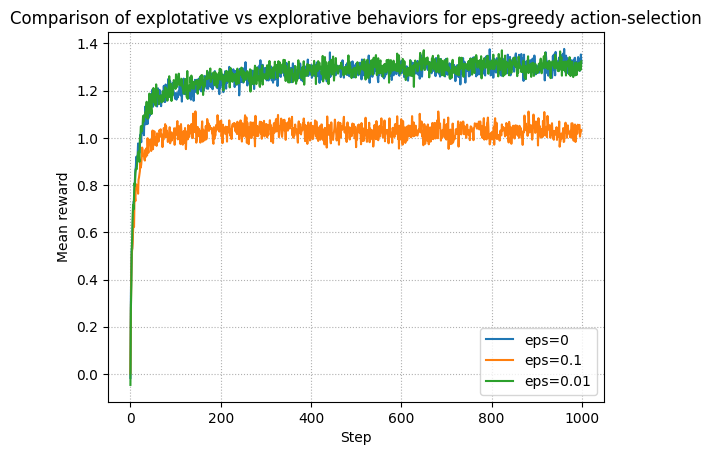

In [41]:
plt.figure()
for eps in epsilons:
    plt.plot(np.arange(1000), reward_dict[eps], label=f'eps={eps}')
plt.title("Comparison of explotative vs explorative behaviors for eps-greedy action-selection")
plt.xlabel("Step")
plt.ylabel("Mean reward")
plt.grid(linestyle=':')
plt.legend()
plt.show()